# 新手教程—Pandas库使用示例

以下内容是对pandas库的简要介绍，主要面向新用户，您可以访问http://pandas.pydata.org/pandas-docs/dev/10min.html 查看更多示例，如果您想更深入的学习pandas，推荐您查看《利用Python进行数据分析》一书。

In [1]:
#导入常用libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# auth('ID','Password')

#auth('13811550483','security421S')
#pd.set_option('display.max_rows', 10)


In [6]:
pd.options.display.max_rows = 31

## 数据结构

Pandas最重要的数据结构有Series和DataFrame，这里介绍series一些基本操作。

创建一个Series

In [7]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

创建一个DataFrame，包括一个numpy array, 时间索引和列名字。

In [8]:
dates = pd.date_range('20190101',periods=6)
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2019-01-01,-1.499328,-0.365037,1.022967,-0.619979
2019-01-02,-0.470142,-0.489732,-0.921085,-0.209115
2019-01-03,-1.938439,0.928511,0.702133,0.033485
2019-01-04,-0.387314,0.752152,0.318888,0.041800
2019-01-05,0.008920,-0.609312,0.856873,0.457907
2019-01-06,-0.681568,0.010223,-1.014263,0.491377


创建一个DataFrame，包括一个可以转化为Series的字典

In [10]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:            'B' : pd.Timestamp('20190102'),
   ....:            'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:            'D' : np.array([3] * 4,dtype='int32'),
   ....:            'E' : pd.Categorical(["test","train","test","train"]),
   ....:            'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2019-01-02,1.0,3,test,foo
1,1.0,2019-01-02,1.0,3,train,foo
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

可以完成自动补全功能，下面这是一个例子。

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2019-01-02,1.0,3,test,foo
1,1.0,2019-01-02,1.0,3,train,foo
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


## 查看数据

查看前几条数据

In [13]:
df.head()

,A,B,C,D
2019-01-01,-1.499328,-0.365037,1.022967,-0.619979
2019-01-02,-0.470142,-0.489732,-0.921085,-0.209115
2019-01-03,-1.938439,0.928511,0.702133,0.033485
2019-01-04,-0.387314,0.752152,0.318888,0.041800
2019-01-05,0.008920,-0.609312,0.856873,0.457907


查看后几条数据

In [12]:
df.tail()

,A,B,C,D
2019-01-02,1.029138,-1.177884,0.444500,2.922143
2019-01-03,0.725198,0.852252,0.860231,0.451974
2019-01-04,-0.343829,0.018926,-1.070405,0.513421
2019-01-05,-0.423083,-0.012015,0.883760,-1.161349
2019-01-06,-0.597239,0.399165,-0.412380,-1.991003


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
df.values

array([[-0.68559103, -0.64853555, -0.41307483,  0.92431697],
       [ 1.02913753, -1.17788361,  0.44449979,  2.92214252],
       [ 0.72519805,  0.85225215,  0.86023122,  0.4519736 ],
       [-0.34382891,  0.01892585, -1.0704046 ,  0.51342125],
       [-0.42308337, -0.01201461,  0.88376035, -1.16134857],
       [-0.59723935,  0.39916499, -0.41237967, -1.99100338]])

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.049235,-0.094682,0.048772,0.276584
std,0.734090,0.726690,0.798848,1.715517
min,-0.685591,-1.177884,-1.070405,-1.991003
25%,-0.553700,-0.489405,-0.412901,-0.758018
50%,-0.383456,0.003456,0.016060,0.482697
75%,0.457941,0.304105,0.756298,0.821593
max,1.029138,0.852252,0.883760,2.922143


In [16]:
df.T

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00
A,-0.685591,1.029138,0.725198,-0.343829,-0.423083,-0.597239
B,-0.648536,-1.177884,0.852252,0.018926,-0.012015,0.399165
C,-0.413075,0.444500,0.860231,-1.070405,0.883760,-0.412380
D,0.924317,2.922143,0.451974,0.513421,-1.161349,-1.991003


In [14]:
# df.sort removed
#df.sort(columns='B')

## 选择数据

In [17]:
df['A']

2019-01-01   -0.685591
2019-01-02    1.029138
2019-01-03    0.725198
2019-01-04   -0.343829
2019-01-05   -0.423083
2019-01-06   -0.597239
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3]

,A,B,C,D
2019-01-01,-0.685591,-0.648536,-0.413075,0.924317
2019-01-02,1.029138,-1.177884,0.444500,2.922143
2019-01-03,0.725198,0.852252,0.860231,0.451974


In [19]:
df['20190104':'20190106']

,A,B,C,D
2019-01-04,-0.343829,0.018926,-1.070405,0.513421
2019-01-05,-0.423083,-0.012015,0.883760,-1.161349
2019-01-06,-0.597239,0.399165,-0.412380,-1.991003


In [20]:
df.loc[dates[0]]

A   -0.685591
B   -0.648536
C   -0.413075
D    0.924317
Name: 2019-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:,['A','B']]

,A,B
2019-01-01,-0.685591,-0.648536
2019-01-02,1.029138,-1.177884
2019-01-03,0.725198,0.852252
2019-01-04,-0.343829,0.018926
2019-01-05,-0.423083,-0.012015
2019-01-06,-0.597239,0.399165


In [20]:
df.loc['20190101':'20190103','A':'B']

,A,B
2013-01-01,-1.290152,-1.284711
2013-01-02,0.190730,-0.016160
2013-01-03,-1.026162,0.463271


In [21]:
df.loc['20190101','A':'B']

A   -1.290152
B   -1.284711
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[dates[0],'A']

-1.2901518173417785

In [23]:
df.at[dates[0],'A']

-1.2901518173417785

In [24]:
df.iloc[3]

A   -0.198799
B   -0.275693
C    0.006771
D   -0.103106
Name: 2013-01-04 00:00:00, dtype: float64

In [25]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.198799,-0.275693
2013-01-05,0.630479,-0.174670


In [26]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.190730,-1.401204
2013-01-03,-1.026162,-1.506031
2013-01-05,0.630479,-1.938372


In [27]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.190730,-0.016160,-1.401204,-0.763948
2013-01-03,-1.026162,0.463271,-1.506031,0.346041


In [28]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.284711,0.305865
2013-01-02,-0.016160,-1.401204
2013-01-03,0.463271,-1.506031
2013-01-04,-0.275693,0.006771
2013-01-05,-0.174670,-1.938372
2013-01-06,3.614363,1.706878


In [29]:
df.iloc[1,1]

-0.016159972797852588

In [30]:
df[df.A>0]

,A,B,C,D
2013-01-02,0.190730,-0.016160,-1.401204,-0.763948
2013-01-05,0.630479,-0.174670,-1.938372,0.612056
2013-01-06,1.341044,3.614363,1.706878,0.334069


In [31]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,0.305865,0.253011
2013-01-02,0.190730,NaN,NaN,NaN
2013-01-03,NaN,0.463271,NaN,0.346041
2013-01-04,NaN,NaN,0.006771,NaN
2013-01-05,0.630479,NaN,NaN,0.612056
2013-01-06,1.341044,3.614363,1.706878,0.334069


In [32]:
df2=df.copy()

df2['E']=['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-1.290152,-1.284711,0.305865,0.253011,one
2013-01-02,0.190730,-0.016160,-1.401204,-0.763948,one
2013-01-03,-1.026162,0.463271,-1.506031,0.346041,two
2013-01-04,-0.198799,-0.275693,0.006771,-0.103106,three
2013-01-05,0.630479,-0.174670,-1.938372,0.612056,four
2013-01-06,1.341044,3.614363,1.706878,0.334069,three


In [33]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.026162,0.463271,-1.506031,0.346041,two
2013-01-05,0.630479,-0.174670,-1.938372,0.612056,four


In [34]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20190102',periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [35]:
df['F'] = s1

In [36]:
df.at[dates[0],'A'] = 0

In [37]:
df.iat[0,1] = 0

In [38]:
df.loc[:,'D'] = np.array([5] * len(df))

In [39]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.305865,5,NaN
2013-01-02,0.190730,-0.016160,-1.401204,5,1.0
2013-01-03,-1.026162,0.463271,-1.506031,5,2.0
2013-01-04,-0.198799,-0.275693,0.006771,5,3.0
2013-01-05,0.630479,-0.174670,-1.938372,5,4.0
2013-01-06,1.341044,3.614363,1.706878,5,5.0


In [40]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.305865,-5,NaN
2013-01-02,-0.190730,-0.016160,-1.401204,-5,-1.0
2013-01-03,-1.026162,-0.463271,-1.506031,-5,-2.0
2013-01-04,-0.198799,-0.275693,-0.006771,-5,-3.0
2013-01-05,-0.630479,-0.174670,-1.938372,-5,-4.0
2013-01-06,-1.341044,-3.614363,-1.706878,-5,-5.0


## 缺失数据

缺失数据使用np.nan表示，默认不包括在计算内，可以通过下列方法更改缺失数据。

In [41]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.305865,5,NaN,1.0
2013-01-02,0.190730,-0.016160,-1.401204,5,1.0,1.0
2013-01-03,-1.026162,0.463271,-1.506031,5,2.0,NaN
2013-01-04,-0.198799,-0.275693,0.006771,5,3.0,NaN


In [42]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.19073,-0.01616,-1.401204,5,1.0,1.0


In [43]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.305865,5,5.0,1.0
2013-01-02,0.190730,-0.016160,-1.401204,5,1.0,1.0
2013-01-03,-1.026162,0.463271,-1.506031,5,2.0,5.0
2013-01-04,-0.198799,-0.275693,0.006771,5,3.0,5.0


In [44]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 统计

In [45]:
df.mean()#列计算

A    0.156215
B    0.601852
C   -0.471016
D    5.000000
F    3.000000
dtype: float64

In [46]:
df.mean(1)#行计算

2013-01-01    1.326466
2013-01-02    0.954673
2013-01-03    0.986216
2013-01-04    1.506456
2013-01-05    1.503487
2013-01-06    3.332457
Freq: D, dtype: float64

In [47]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates)#.shift(2)

s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [48]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [49]:
df.sub(s,axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.026162,-0.536729,-2.506031,4.0,1.0
2013-01-04,-3.198799,-3.275693,-2.993229,2.0,0.0
2013-01-05,-4.369521,-5.174670,-6.938372,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.305865,5,NaN
2013-01-02,0.190730,-0.016160,-1.401204,5,1.0
2013-01-03,-1.026162,0.463271,-1.506031,5,2.0
2013-01-04,-0.198799,-0.275693,0.006771,5,3.0
2013-01-05,0.630479,-0.174670,-1.938372,5,4.0
2013-01-06,1.341044,3.614363,1.706878,5,5.0


In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.305865,5,NaN
2013-01-02,0.190730,-0.016160,-1.095339,10,1.0
2013-01-03,-0.835432,0.447111,-2.601370,15,3.0
2013-01-04,-1.034231,0.171419,-2.594599,20,6.0
2013-01-05,-0.403752,-0.003251,-4.532971,25,10.0
2013-01-06,0.937292,3.611112,-2.826093,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    2.367206
B    3.890056
C    3.645249
D    0.000000
F    4.000000
dtype: float64

In [53]:
s = pd.Series(np.random.randint(0,7,size=10))

s

0    5
1    2
2    5
3    0
4    5
5    3
6    0
7    6
8    2
9    0
dtype: int64

In [54]:
s.value_counts()#统计频率

5    3
0    3
2    2
6    1
3    1
dtype: int64

In [55]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 规整 Merge

### concat

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,1.131243,-0.383814,-1.147596,0.342241
1,-0.974153,0.579128,0.427777,1.003659
2,1.122058,0.162732,0.748263,0.241594
3,0.539217,-0.178712,-1.023993,0.885924
4,0.347573,-0.061660,-0.223924,0.809106
5,0.189326,-1.419243,-1.509009,-1.921227
6,1.297445,-0.259724,0.950509,-3.342635
7,1.444150,-0.943037,0.473343,0.100755
8,-0.893656,-1.804846,0.359391,0.872148
9,-0.292879,-0.223761,-0.140937,0.881455


In [57]:
# break it into pieces

pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.131243,-0.383814,-1.147596,0.342241
1,-0.974153,0.579128,0.427777,1.003659
2,1.122058,0.162732,0.748263,0.241594
3,0.539217,-0.178712,-1.023993,0.885924
4,0.347573,-0.061660,-0.223924,0.809106
5,0.189326,-1.419243,-1.509009,-1.921227
6,1.297445,-0.259724,0.950509,-3.342635
7,1.444150,-0.943037,0.473343,0.100755
8,-0.893656,-1.804846,0.359391,0.872148
9,-0.292879,-0.223761,-0.140937,0.881455


### merge

In [58]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [59]:
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right

,key,rval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,0.011434,0.561576,-0.404883,-0.379071
1,0.219870,-0.262600,1.655387,-1.337430
2,0.049214,0.755147,-0.627302,0.222629
3,0.473009,-0.855307,0.353166,-0.914310
4,-0.514169,0.412218,0.982430,0.125486
5,0.517962,-0.516783,-1.503420,-0.822614
6,0.669895,-0.772236,1.306589,-1.052182
7,-0.698510,-0.473854,-0.716590,0.728072


In [63]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,0.011434,0.561576,-0.404883,-0.379071
1,0.219870,-0.262600,1.655387,-1.337430
2,0.049214,0.755147,-0.627302,0.222629
3,0.473009,-0.855307,0.353166,-0.914310
4,-0.514169,0.412218,0.982430,0.125486
5,0.517962,-0.516783,-1.503420,-0.822614
6,0.669895,-0.772236,1.306589,-1.052182
7,-0.698510,-0.473854,-0.716590,0.728072
8,0.473009,-0.855307,0.353166,-0.914310


In [64]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
   ....: 
        
df

,A,B,C,D
0,foo,one,-1.041123,0.737415
1,bar,one,0.291852,0.013531
2,foo,two,-1.224050,0.391930
3,bar,three,0.621681,-0.534412
4,foo,two,0.760493,-0.294558
5,bar,two,0.313155,2.205908
6,foo,one,0.868063,0.460429
7,foo,three,-0.594629,0.504813


## Grouping

In [65]:
df.groupby('A').sum()

,C,D
A,,
bar,1.226688,1.685026
foo,-1.231246,1.800030


In [66]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.291852  0.013531
    three  0.621681 -0.534412
    two    0.313155  2.205908
foo one   -0.173060  1.197845
    three -0.594629  0.504813
    two   -0.463557  0.097372

## Stack

In [67]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 
        
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one     0.080766 -0.354664
      two     0.303445  1.277421
baz   one     1.062678 -0.129409
      two    -0.212398  1.429073

In [68]:
stacked = df2.stack()

stacked 

first  second   
bar    one     A    0.080766
               B   -0.354664
       two     A    0.303445
               B    1.277421
baz    one     A    1.062678
               B   -0.129409
       two     A   -0.212398
               B    1.429073
dtype: float64

In [69]:
stacked.unstack()

A         B
first second                    
bar   one     0.080766 -0.354664
      two     0.303445  1.277421
baz   one     1.062678 -0.129409
      two    -0.212398  1.429073

In [70]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.080766  0.303445
      B -0.354664  1.277421
baz   A  1.062678 -0.212398
      B -0.129409  1.429073

In [71]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.080766  1.062678
       B -0.354664 -0.129409
two    A  0.303445 -0.212398
       B  1.277421  1.429073

In [72]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....: 
        
df 

,A,B,C,D,E
0,one,A,foo,-0.205510,-0.679928
1,one,B,foo,1.103425,1.041510
2,two,C,foo,1.125007,-1.420997
3,three,A,bar,-0.119722,1.008541
4,one,B,bar,-1.490830,-0.352484
5,one,C,bar,-1.001101,0.345048
6,two,A,foo,-1.130468,0.621845
7,three,B,foo,0.406999,0.905440
8,one,C,foo,0.404920,-0.179066
9,one,A,bar,1.385306,0.123467


In [73]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.385306 -0.205510
      B -1.490830  1.103425
      C -1.001101  0.404920
three A -0.119722       NaN
      B       NaN  0.406999
      C  0.007584       NaN
two   A       NaN -1.130468
      B  0.838099       NaN
      C       NaN  1.125007

## Time Series

In [14]:
rng = pd.date_range('1/1/2019', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min', how='sum')

2019-01-01    25540
Freq: 5T, dtype: int32

In [75]:
ts

2012-01-01 00:00:00    371
2012-01-01 00:00:01    157
2012-01-01 00:00:02    344
2012-01-01 00:00:03    470
2012-01-01 00:00:04    486
2012-01-01 00:00:05    397
2012-01-01 00:00:06     46
2012-01-01 00:00:07     77
2012-01-01 00:00:08    390
2012-01-01 00:00:09      0
2012-01-01 00:00:10    208
2012-01-01 00:00:11    259
2012-01-01 00:00:12    364
2012-01-01 00:00:13    441
2012-01-01 00:00:14    290
                      ... 
2012-01-01 00:01:25    164
2012-01-01 00:01:26    218
2012-01-01 00:01:27     91
2012-01-01 00:01:28    170
2012-01-01 00:01:29    427
2012-01-01 00:01:30    224
2012-01-01 00:01:31    130
2012-01-01 00:01:32    482
2012-01-01 00:01:33    375
2012-01-01 00:01:34    292
2012-01-01 00:01:35    114
2012-01-01 00:01:36    143
2012-01-01 00:01:37    448
2012-01-01 00:01:38    435
2012-01-01 00:01:39    471
Freq: S, Length: 100, dtype: int64

In [15]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
 
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.335075
2012-03-07    1.021619
2012-03-08    0.783749
2012-03-09   -0.399156
2012-03-10    0.869651
Freq: D, dtype: float64

In [16]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00   -0.335075
2012-03-07 00:00:00+00:00    1.021619
2012-03-08 00:00:00+00:00    0.783749
2012-03-09 00:00:00+00:00   -0.399156
2012-03-10 00:00:00+00:00    0.869651
Freq: D, dtype: float64

In [78]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.947631
2012-03-06 19:00:00-05:00    0.067918
2012-03-07 19:00:00-05:00   -0.136712
2012-03-08 19:00:00-05:00   -1.338626
2012-03-09 19:00:00-05:00    0.187815
Freq: D, dtype: float64

In [79]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31    1.394655
2012-02-29    0.062511
2012-03-31    0.457832
2012-04-30   -0.907441
2012-05-31   -1.054522
Freq: M, dtype: float64

In [80]:
ps = ts.to_period()

ps

2012-01    1.394655
2012-02    0.062511
2012-03    0.457832
2012-04   -0.907441
2012-05   -1.054522
Freq: M, dtype: float64

In [81]:
ps.to_timestamp()

2012-01-01    1.394655
2012-02-01    0.062511
2012-03-01    0.457832
2012-04-01   -0.907441
2012-05-01   -1.054522
Freq: MS, dtype: float64

In [82]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -1.309780
1990-06-01 09:00    0.140386
1990-09-01 09:00    0.857485
1990-12-01 09:00    2.320029
1991-03-01 09:00   -1.019216
Freq: H, dtype: float64

## Categoricals

In [83]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [84]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [85]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [86]:
# df.sort removed
# df.sort("grade")

In [87]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

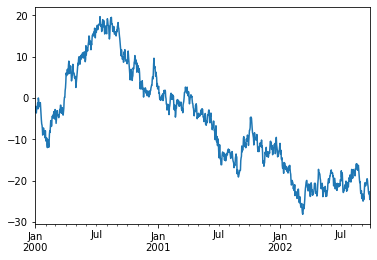

In [17]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

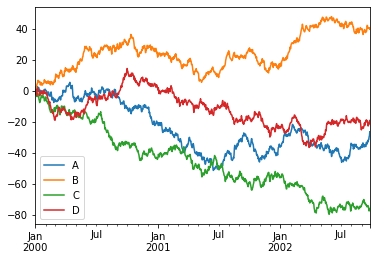

In [18]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
        
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')